In [72]:
#import relevant packages 
import numpy as np
import pandas as pd

#import packages for regular expressions 
import regex
import re

#Importing NLTK and NLP packages
import nltk
from nltk.tokenize import TweetTokenizer
import string
from collections import defaultdict

# import for PCA
import scipy.sparse as sp
from adjustText import adjust_text
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

#import for vizualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [73]:
#read in data
data_danish = pd.read_csv('data_danish.csv')

In [74]:
# bag of words (to ourselves - see which words are frequent)

#the 100 most used words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

frequent_words = get_top_n_words(data_danish.proc_text_all)

In [75]:
frequent_words[:10]

[('dkpol', 3506),
 ('barn', 2630),
 ('dkaid', 2218),
 ('verden', 1160),
 ('danmark', 834),
 ('tak', 809),
 ('land', 785),
 ('støtte', 777),
 ('covid19', 736),
 ('menneske', 714)]

In [4]:
frequent_words2 = [pair[0] for pair in frequent_words if pair[1] >= 10]

In [5]:
len(frequent_words2)

2920

In [6]:
words_high_freq = []

for string in data_danish.proc_text_all:
    xx = ""
    for word in string.split():
        if word in frequent_words2:
            xx += word + ' '
    words_high_freq.append(xx)
#data_danish.head()

data_danish['proc_freq'] = words_high_freq

In [7]:
data_danish.head()

,actor,tweet,date,retweet,date_convert,@mentions,#hashtags,emojis,clean_text,language,words,without_stopwords,lemmas,proc_text,bigrams,proc_text_all,proc_freq
0,PlanBornefonden,"13-årige Larissa bor i Sahel-regionen, og var ...",2021-05-14 09:03:00,NaN,2021-05-14 00:00:00,NaN,NaN,,årige larissa bor i sahelregionen og var i tvu...,da,"['årige', 'larissa', 'bor', 'i', 'sahelregione...","['årige', 'larissa', 'bor', 'sahelregionen', '...","['årig', 'larissa', 'bor', 'sahelregion', 'tvi...",årig larissa bor sahelregion tvinge flygte lan...,"['årig_larissa', 'larissa_bor', 'bor_sahelregi...",årig larissa bor sahelregion tvinge flygte lan...,årig bor sahelregion tvinge flygte landsby man...
1,PlanBornefonden,Vi ønsker alle muslimer en god Eid i aften! Ei...,2021-05-12 14:00:02,NaN,2021-05-12 00:00:00,NaN,NaN,,vi ønsker alle muslimer en god eid i aften eid...,da,"['vi', 'ønsker', 'alle', 'muslimer', 'en', 'go...","['ønsker', 'muslimer', 'god', 'eid', 'aften', ...","['ønske', 'muslim', 'god', 'eid', 'aften', 'ei...",ønske muslim god eid aften eid mubarak,"['ønske_muslim', 'muslim_god', 'god_eid', 'eid...",ønske muslim god eid aften eid mubarak ønske_m...,ønske god eid aften eid
2,PlanBornefonden,Kom til samtalekøkken med @BosseStine og @Clau...,2021-05-12 11:58:03,@dorthe10,2021-05-12 00:00:00,"['BosseStine, ClausMeyerDK']",dkfood,,kom til samtalekøkken med og den maj og spis e...,da,"['kom', 'til', 'samtalekøkken', 'med', 'og', '...","['kom', 'samtalekøkken', 'maj', 'spis', 'lække...","['komme', 'samtalekøkken', 'maj', 'spise', 'læ...",komme samtalekøkken maj spise lækker ret menu ...,"['komme_samtalekøkken', 'samtalekøkken_maj', '...",komme samtalekøkken maj spise lækker ret menu ...,komme maj spise ret men klog kærlighed penge m...
3,PlanBornefonden,"Mali, Burkina Faso og Niger - også kendt som d...",2021-05-12 10:00:02,NaN,2021-05-12 00:00:00,NaN,NaN,,mali burkina faso og niger også kendt som det ...,da,"['mali', 'burkina', 'faso', 'og', 'niger', 'og...","['mali', 'burkina', 'faso', 'niger', 'kendt', ...","['mali', 'burkina', 'faso', 'niger', 'kendt', ...",mali burkina faso niger kendt central sahele s...,"['mali_burkina', 'burkina_faso', 'faso_niger',...",mali burkina faso niger kendt central sahele s...,mali burkina faso niger kendt central sahele s...
4,PlanBornefonden,Vores seje kollega Iben Østergaard Markussen f...,2021-05-12 09:23:14,@dorthe10,2021-05-12 00:00:00,"['radioloud_dk, MaternityF']",NaN,,vores seje kollega iben østergaard markussen f...,da,"['vores', 'seje', 'kollega', 'iben', 'østergaa...","['seje', 'kollega', 'iben', 'østergaard', 'mar...","['sej', 'kollega', 'ibe', 'østergaard', 'marku...",sej kollega ibe østergaard markusse fortæller ...,"['sej_kollega', 'kollega_ibe', 'ibe_østergaard...",sej kollega ibe østergaard markusse fortæller ...,sej kollega fortæller morgen podcast arbejde u...


# PCA 
## PCA without restricted local neighbours

Here we run the PCA on all types of words, as long as they occur in minimum 10 documents. The PCA includes word tokens, bigrams and hashtags, whereas the latter do not occurs as bigrams.

In [45]:
#SET VECTOR 

# Instantiante the counting class
vectorizer = CountVectorizer(ngram_range=(1,1)) 
# Count the number of times each word type appear in each tweet
doc2type = vectorizer.fit_transform(data_danish.proc_freq) 
# Restrict count to 1, i.e. we get the tweet-frequency of each word (how many tweets it appear in)
doc2type[doc2type>0] = 1  
# Get the sequence of words according to how they are counted
type_names = np.array(vectorizer.get_feature_names()) 
n_docs, n_types = doc2type.shape

In [46]:
doc2type.shape

(9449, 2902)

In [47]:
#IDENTIFY INFREQUENCY WORDS 

# if words are appearing in less than 10 docs, remove
abs_th = 10

# Calculate the tweet-frequency of each word
type_doc_freq = np.squeeze(np.asarray(np.sum(doc2type, axis=0)/n_docs))

# Identify indices of words that meet the threshold - returns boolean (True/False) 
# array of length = number of words
type_mask = type_doc_freq >= abs_th / n_docs

# Identify the indices of words that meet the threshold
type_mask_idx = np.arange(n_types)[type_mask]

# Print number and share of words that meet criteria
print('{} words ({:0.0f}%) appear in at least {} tweets'.format(sum(type_mask), 100*sum(type_mask)/n_types, abs_th))

2800 words (96%) appear in at least 10 tweets


# Creating the actor term matrix

In [48]:
### Count the number of times each actor use each word

# list of indices that would sort by screen_name, which is the column of the NGO name
sidx = np.argsort(np.array(data_danish.actor)) 
# Identify unique actor names and where actor name changes in sorted list
actor_names, grp_start_idx = np.unique(np.array(data_danish.actor)[sidx], return_index=True)
# Sum word count for all tweets by each actor
actor2type = np.add.reduceat(doc2type[sidx,:].toarray(), grp_start_idx) 
n_actors = actor2type.shape[0]

In [49]:
### Scale the count data, we calculate frequency, and scale frequencies for each word

# Calculate how frequent each actor use each word
actor2type_frequency = actor2type/actor2type.sum(axis=1)[:, np.newaxis]

# Scale frequency within each associated word (zero mean, unit variance)
standardized_actor2type_frequency = StandardScaler().fit_transform(actor2type_frequency[:, type_mask_idx])

^Here we could choose to do another option, e.g. measure of association as between words (PPMI) 


In [50]:
type_names[type_mask_idx][:100]

array(['8marts', 'aalborg', 'aarhus', 'abort', 'absolut', 'absurd',
       'accelerere', 'additionel', 'adfærd', 'adgang', 'adgang_ren',
       'adgang_uddannelse', 'adgang_vaccine', 'administration',
       'adskille', 'advare', 'advarsel', 'advocacy', 'advokat', 'afbøde',
       'afghanistan', 'afgrøde', 'afgøre', 'afholde', 'afhængig',
       'aflyse', 'afrika', 'afrikansk', 'afrikansk_land', 'afskaffe',
       'afslag', 'afsløre', 'afsnit', 'afstand', 'afsted', 'afsætte',
       'aftale', 'aften', 'afvise', 'afvise_asylansøger', 'afværge',
       'agere', 'aggressiv', 'aktiv', 'aktivisme', 'aktivist',
       'aktivitet', 'aktuel', 'aktør', 'akut', 'akut_behov', 'akut_bruge',
       'al', 'alder', 'aldersdiskrimination', 'aldersgrænse', 'aldrig',
       'ale', 'alhol', 'alkohol', 'alkoholkultur', 'allerede',
       'allermest', 'alliance', 'alligevel', 'almindelig', 'alroj',
       'altafgørende', 'alternativ', 'altid', 'alting', 'altså', 'alvor',
       'alvorlig', 'alvorlig_konsek

In [51]:
# See the raw counts
pd.DataFrame(actor2type[:,type_mask_idx], index = actor_names, columns = type_names[type_mask_idx])

,8marts,aalborg,aarhus,abort,absolut,absurd,accelerere,additionel,adfærd,adgang,...,økonomi,økonomisk,økonomisk_konsekvens,økonomisk_kris,økonomisk_system,ønske,østafrika,øverst,øvrig,øvrigt
ADRA_Danmark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVestegnen,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
ActionAidDK,1,1,4,0,1,0,1,0,0,2,...,0,8,0,3,2,3,0,0,0,2
BornsVilkar,1,0,4,0,2,0,0,0,2,1,...,2,9,0,0,0,8,0,0,1,0
CARE_Danmark,0,0,0,0,0,0,3,11,0,10,...,2,6,0,0,0,1,3,1,1,1
CaritasDanmark,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
DKIndsamling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DRC_dk,1,1,0,0,0,0,0,0,0,12,...,0,6,1,1,0,2,6,0,0,0
DignityDK,1,0,0,0,4,0,1,0,1,12,...,0,4,0,0,0,11,1,1,0,0
MissionEast,0,0,0,0,0,0,0,0,0,2,...,1,1,0,0,0,0,0,0,0,0


In [52]:
# See the standardized word frequencies
pd.DataFrame(standardized_actor2type_frequency, index = actor_names, columns = type_names[type_mask_idx])

,8marts,aalborg,aarhus,abort,absolut,absurd,accelerere,additionel,adfærd,adgang,...,økonomi,økonomisk,økonomisk_konsekvens,økonomisk_kris,økonomisk_system,ønske,østafrika,øverst,øvrig,øvrigt
ADRA_Danmark,-0.467885,-0.429516,-0.504443,-0.340233,-0.573510,-0.406215,-0.437355,-0.315797,-0.474400,-0.968310,...,-0.664145,-0.876979,-0.540320,-0.563433,-0.251954,-0.963824,-0.427900,-0.501341,-0.386618,-0.537882
AVestegnen,-0.467885,-0.429516,-0.504443,-0.340233,-0.573510,2.083425,-0.437355,-0.315797,-0.474400,-0.593453,...,-0.664145,-0.876979,-0.540320,-0.563433,-0.251954,-0.059373,-0.427900,-0.501341,-0.386618,-0.537882
ActionAidDK,0.263704,0.243208,0.941193,-0.340233,0.667379,-0.406215,0.434008,-0.315797,-0.474400,-0.737934,...,-0.664145,0.490436,-0.540320,2.990737,1.479823,-0.130050,-0.427900,-0.501341,-0.386618,1.944280
BornsVilkar,-0.046434,-0.429516,0.328354,-0.340233,0.856183,-0.406215,-0.437355,-0.315797,1.158101,-0.901953,...,-0.305352,0.009223,-0.540320,-0.563433,-0.251954,0.317022,-0.427900,-0.501341,-0.049678,-0.537882
CARE_Danmark,-0.467885,-0.429516,-0.504443,-0.340233,-0.573510,-0.406215,1.619179,4.396082,-0.474400,-0.062114,...,-0.174163,-0.070159,-0.540320,-0.563433,-0.251954,-0.745177,0.966423,0.588345,0.073520,0.438490
CaritasDanmark,-0.467885,4.303778,2.038435,-0.340233,-0.573510,-0.406215,-0.437355,-0.315797,-0.474400,-0.968310,...,-0.664145,0.325664,-0.540320,-0.563433,-0.251954,-0.963824,-0.427900,-0.501341,-0.386618,-0.537882
DKIndsamling,-0.467885,-0.429516,-0.504443,-0.340233,-0.573510,-0.406215,-0.437355,-0.315797,-0.474400,-0.968310,...,-0.664145,-0.876979,-0.540320,-0.563433,-0.251954,-0.963824,-0.427900,-0.501341,-0.386618,-0.537882
DRC_dk,0.459216,0.422989,-0.504443,-0.340233,-0.573510,-0.406215,-0.437355,-0.315797,-0.474400,0.783343,...,-0.664145,0.422656,0.739591,0.937900,-0.251954,-0.259428,4.064081,-0.501341,-0.386618,-0.537882
DignityDK,-0.116480,-0.429516,-0.504443,-0.340233,1.810640,-0.406215,-0.018812,-0.315797,0.206188,-0.304370,...,-0.664145,-0.548574,-0.540320,-0.563433,-0.251954,0.504630,-0.144130,0.163973,-0.386618,-0.537882
MissionEast,-0.467885,-0.429516,-0.504443,-0.340233,-0.573510,-0.406215,-0.437355,-0.315797,-0.474400,0.045378,...,0.706112,-0.124876,-0.540320,-0.563433,-0.251954,-0.963824,-0.427900,-0.501341,-0.386618,-0.537882


## Performing the PCA without restricted neighbours 

In [53]:
## Option 2. Use the PCA implementation in Scikit-Learn: 

# Instantiate the PCA class
pca = PCA(n_components=n_actors) 

# Return unstandardized PC scores (i.e. U@S from SVD)
raw_PC = pca.fit_transform(standardized_actor2type_frequency) 

# Get singular values
S = np.diag(pca.singular_values_)

# Get standardized PC scores
PC = raw_PC@np.linalg.inv(S)*np.sqrt(n_actors-1) 

# Scale PC scores
scaled_PC = PC / np.max(abs(PC), axis=0) 

# Obtain standardized term loadings (maps from PC to feature space)
L = pca.components_.T@S/np.sqrt(n_actors-1)

# Obtain word weights (maps from feature to PC space)
W = (pca.components_.T@np.linalg.inv(S))*np.sqrt(n_actors-1) # Get word weights (maps from feature to PC space)

# Get proportion of captured variance
explained_variance = pca.explained_variance_ratio_

In [54]:
### Inspect loadings
# For unit-scaled features, they are the correlation between the standardized PCs and 
#the features
# I.e. how much does each words standardized frequency correlate with each PC dimension
print(L.max())
print(L.min())
pd.DataFrame(L, index=type_names[type_mask_idx], columns=['PC{}'.format(d) for d in range(1,L.shape[1]+1)])

0.8315198426237244
-0.7542720950959446


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
8marts,-0.384020,-0.237834,0.011082,-0.175102,0.045295,-0.133367,0.246703,-0.069009,-0.142454,-0.040952,...,-0.269028,-0.261883,0.251434,-0.083292,-0.242407,0.324406,-0.121604,0.060810,-0.020167,2.903364e-16
aalborg,-0.087927,0.347579,-0.230608,0.075942,-0.258236,-0.130693,-0.074621,0.686079,0.042400,-0.134019,...,-0.053252,0.064533,0.117595,0.108018,0.036760,0.029934,-0.020829,0.064145,-0.005031,-1.069077e-15
aarhus,0.110892,0.184110,-0.363340,-0.215267,-0.436503,0.109706,0.025915,0.460332,-0.003100,0.211533,...,-0.166058,0.070955,-0.124128,-0.101099,0.010437,0.122012,0.039165,0.049342,-0.000284,1.260312e-16
abort,0.135074,-0.293217,0.032109,0.216330,-0.009895,-0.139628,0.067624,0.096677,-0.005775,-0.043318,...,-0.108631,0.600758,-0.274330,-0.204652,-0.205069,-0.098383,-0.019006,-0.151794,-0.006794,3.284265e-15
absolut,-0.080206,-0.277856,-0.072592,-0.191631,-0.330827,-0.125889,-0.151494,-0.117726,0.139174,0.198055,...,0.028302,-0.205753,-0.381899,-0.234183,0.291221,0.163014,-0.003882,-0.010730,0.002810,-7.667196e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ønske,0.072876,0.066228,-0.214460,0.103936,-0.163156,0.312368,0.046973,-0.015230,-0.389726,0.056274,...,-0.027014,-0.206193,-0.071794,-0.175166,-0.052956,0.127192,0.156126,-0.140462,-0.009663,-7.323709e-17
østafrika,-0.325442,-0.132478,0.087583,-0.149554,0.188036,0.063639,0.139297,0.098112,-0.086005,0.010583,...,-0.083795,-0.089462,0.450978,-0.291288,-0.067009,0.010377,-0.203227,0.122943,0.010511,-7.021078e-18
øverst,-0.426733,-0.196300,-0.031740,-0.204080,0.053621,-0.150423,0.234231,-0.013372,-0.159551,-0.052024,...,-0.148862,-0.041335,-0.139730,0.151374,0.367473,-0.095667,-0.216768,-0.063092,0.024899,3.868774e-17
øvrig,-0.065666,-0.087473,-0.364763,-0.391516,-0.194885,-0.117433,-0.134697,0.135747,-0.011487,0.385500,...,-0.131448,-0.006640,-0.106161,-0.195892,-0.047751,-0.114568,0.195826,0.120764,0.001501,1.355612e-17


In [55]:
# Calculate the cumulative amount of variance captured 
cumulative_variance = np.cumsum(explained_variance)

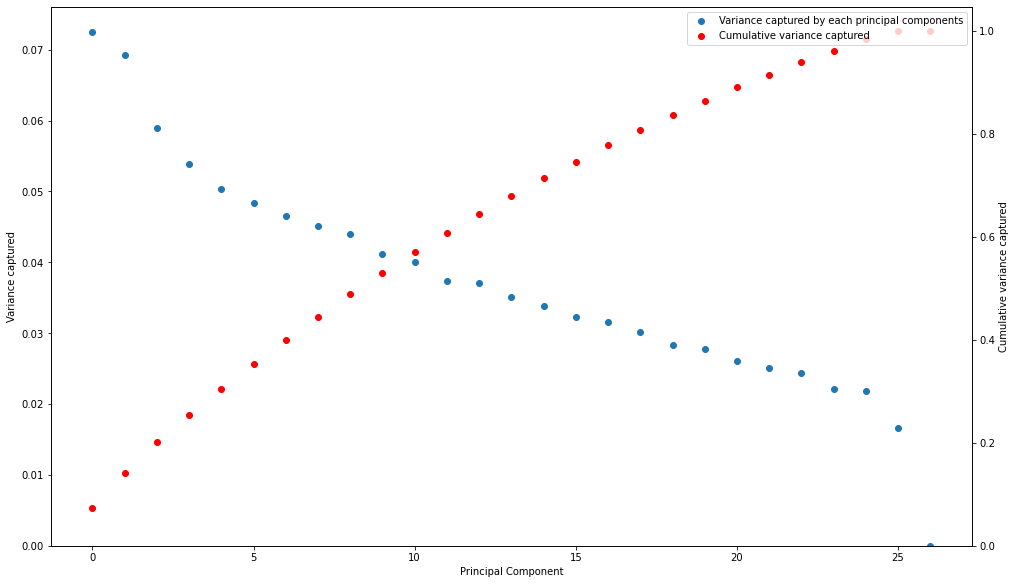

In [59]:
### Assess the amount of variance captured by each principal components

fig, ax = plt.subplots(1,1, figsize = (14,8), constrained_layout=True)

# Plot the amount of variance captured by each principal components
sc1 = ax.scatter(range(n_actors), explained_variance, label='Variance captured by each principal components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance captured')
ax.set_ylim(ymin=0)

# Plot the cumulative amount of variance captured on second y-axis
ax2 = ax.twinx()  # Create second y-axis
sc2 = ax2.scatter(range(n_actors), cumulative_variance, color='red', label='Cumulative variance captured')
ax2.set_ylabel('Cumulative variance captured')
ax2.set_ylim(ymin=0)

plt.legend(handles = [sc1, sc2], loc=1)
plt.savefig('variance.png')

### Plot dimension 1 and 2

In [57]:
### Identify the types that loads most on each principal dimension

# Determine how many words to plot in each direction
n_terms = 20

# Identify the indices that sorts the two first components
PCa_load_sidx = L[:,0].argsort()
PCb_load_sidx = L[:,1].argsort()

# Find the terms that load most on the first principal component
PCa_plot_idx = np.concatenate((PCa_load_sidx[:n_terms], PCa_load_sidx[-n_terms:]))

# Identify remaining indices
remain_idx = np.array([idx for idx in PCb_load_sidx if idx not in PCa_plot_idx])

# Find the remaining terms that load most on the second principal component
PCb_plot_idx = np.concatenate((remain_idx[:n_terms], remain_idx[-n_terms:]))

# Combine the indices
PC_plot_idx = np.unique(np.concatenate((PCa_plot_idx, PCb_plot_idx)))

# Get the term names
PC_plot_names = type_names[PC_plot_idx]

# Get the term loadings
PC_plot_load = L[PC_plot_idx,:]

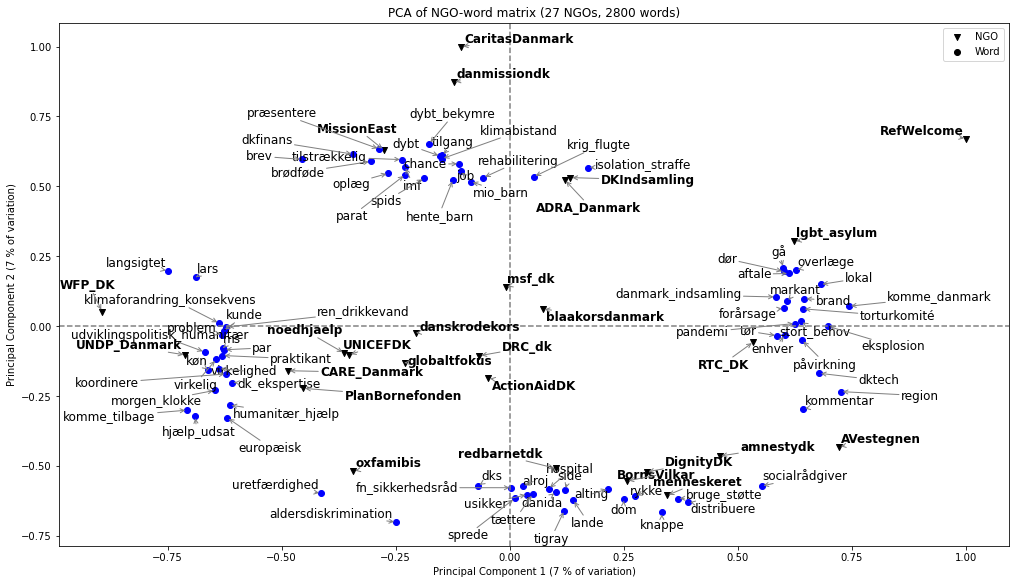

In [58]:
### Plot the socio-symbolic constellation

fig, ax = plt.subplots(1,1, figsize = (14,8), constrained_layout=True)

# Title and label text 
ax.set_title('PCA of NGO-word matrix ({} NGOs, {} words)'.format(standardized_actor2type_frequency.shape[0],
                                                                 standardized_actor2type_frequency.shape[1],
                                                                 fontsize = 20,fontweight='bold'))
ax.set_xlabel('Principal Component 1 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[0], fontsize = 15))
ax.set_ylabel('Principal Component 2 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[1], fontsize = 15))

# Grid to mark zero loading             
ax.axvline(x=0, c='grey', linestyle='--')
ax.axhline(y=0, c='grey', linestyle='--')
       
# Plot standardized principal component scores
ax.scatter(scaled_PC[:,0], scaled_PC[:,1], marker = 'v', label='NGO', c='black')

# Plot word loadings
ax.scatter(PC_plot_load[:,0], PC_plot_load[:, 1], marker = 'o', label='Word', c='blue')

# Annotate the plot
texts = []
for x, y, txt in zip(scaled_PC[:,0], scaled_PC[:,1], actor_names):
    texts.append(plt.text(x, y, txt, size=12, weight='bold'))


for x, y, txt in zip(PC_plot_load[:,0], PC_plot_load[:,1], PC_plot_names):
    texts.append(plt.text(x, y, txt, size=12))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey')) # This part is slow

# Set legend to black
plt.legend()
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
             
plt.show()

### Plot dimension 3 and 4

In [60]:
### Identify the types that loads most on each principal dimension

# Determine how many words to plot in each direction
n_terms = 15

# Identify the indices that sorts the two first components
PCa_load_sidx = L[:,0].argsort()
PCb_load_sidx = L[:,2].argsort()

# Find the terms that load most on the first principal component
PCa_plot_idx = np.concatenate((PCa_load_sidx[:n_terms], PCa_load_sidx[-n_terms:]))

# Identify remaining indices
remain_idx = np.array([idx for idx in PCb_load_sidx if idx not in PCa_plot_idx])

# Find the remaining terms that load most on the second principal component
PCb_plot_idx = np.concatenate((remain_idx[:n_terms], remain_idx[-n_terms:]))

# Combine the indices
PC_plot_idx = np.unique(np.concatenate((PCa_plot_idx, PCb_plot_idx)))

# Get the term names
PC_plot_names = type_names[PC_plot_idx]

# Get the term loadings
PC_plot_load = L[PC_plot_idx,:]

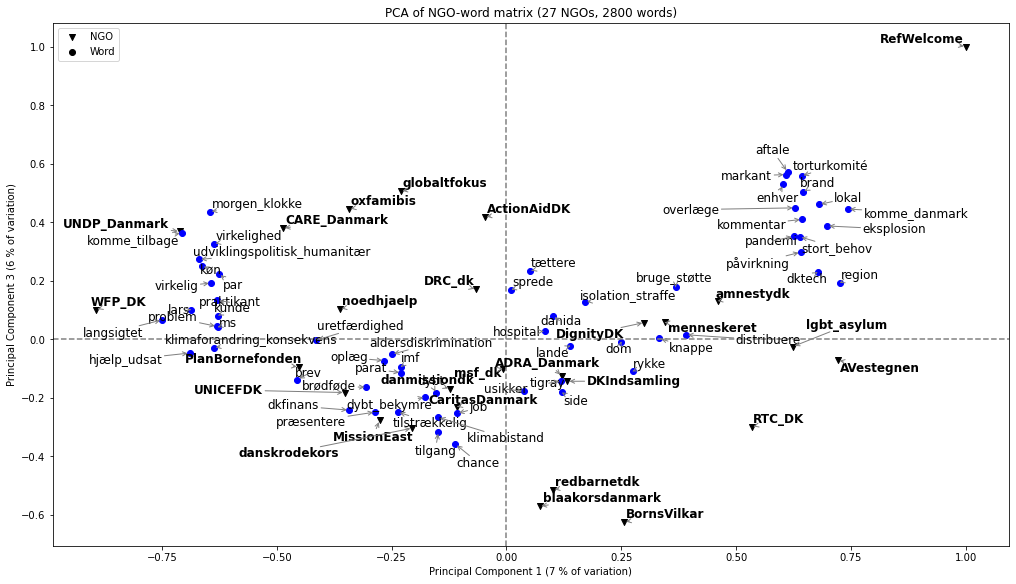

In [22]:
#TRYING WITH DIMENSION 2 AND 3 

### Plot the socio-symbolic constellation
from adjustText import adjust_text
fig, ax = plt.subplots(1,1, figsize = (14,8), constrained_layout=True)

# Title and label text 
ax.set_title('PCA of NGO-word matrix ({} NGOs, {} words)'.format(standardized_actor2type_frequency.shape[0],
                                                                 standardized_actor2type_frequency.shape[1],
                                                                 fontsize = 20,fontweight='bold'))
ax.set_xlabel('Principal Component 1 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[0], fontsize = 15))
ax.set_ylabel('Principal Component 3 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[2], fontsize = 15))

# Grid to mark zero loading             
ax.axvline(x=0, c='grey', linestyle='--')
ax.axhline(y=0, c='grey', linestyle='--')
       
# Plot standardized principal component scores
ax.scatter(scaled_PC[:,0], scaled_PC[:,2], marker = 'v', label='NGO', c='black')

# Plot word loadings
ax.scatter(PC_plot_load[:,0], PC_plot_load[:, 2], marker = 'o', label='Word', c='blue')

# Annotate the plot
texts = []
for x, y, txt in zip(scaled_PC[:,0], scaled_PC[:,2], actor_names):
    texts.append(plt.text(x, y, txt, size=12, weight='bold'))


for x, y, txt in zip(PC_plot_load[:,0], PC_plot_load[:,2], PC_plot_names):
    texts.append(plt.text(x, y, txt, size=12))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey')) # This part is slow

# Set legend to black
plt.legend()
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
             
plt.show()

# PCA with restricted local neighbours in relation to Covid-19

In [60]:
#SET VECTOR 

vectorizer = CountVectorizer(ngram_range=(1,1)) # Instantiante the counting class
doc2type = vectorizer.fit_transform(data_danish.proc_freq) # Count the number of times each word type appear in each tweet
doc2type[doc2type>0] = 1 # Restrict count to 1, i.e. we get the tweet-frequency of each word (how many tweets it appear in) 
type_names = np.array(vectorizer.get_feature_names()) # Get the sequence of words according to how they are counted
n_docs, n_types = doc2type.shape
#IDENTIFY INFREQUENCY WORDS 

# if words are appearing in less than 10 docs, remove
abs_th = 10

# Calculate the tweet-frequency of each word
type_doc_freq = np.squeeze(np.asarray(np.sum(doc2type, axis=0)/n_docs))

# Identify indices of words that meet the threshold - returns boolean (True/False) 
# array of length = number of words
type_mask = type_doc_freq >= abs_th / n_docs

# Identify the indices of words that meet the threshold
type_mask_idx = np.arange(n_types)[type_mask]

# Print number and share of words that meet criteria
print('{} words ({:0.0f}%) appear in at least {} tweets'.format(sum(type_mask), 100*sum(type_mask)/n_types, abs_th))

2800 words (96%) appear in at least 10 tweets


In [61]:
# Calculate the binarized type co-occurence matrix
type_cooc = doc2type.T @ doc2type

# Calculate the co-occurence tweet-frequency
cooc_doc_freq = type_cooc / n_docs # Does not sum to one, as one terms occurence in a tweet 
                                   # does not exclude others

# Divide observed co-occurence frequency with product of marginal word frequencies 
# (expected co-occurence if 'independent')
# and scale with actual frequency, to give less weight to infrequent co-occurences
type_cooc_assoc = cooc_doc_freq.multiply(sp.csr_matrix(cooc_doc_freq / 
                                                      (sp.csr_matrix(type_doc_freq).T @ sp.csr_matrix(type_doc_freq))))

# Drop self-association
type_cooc_assoc = type_cooc_assoc - sp.dia_matrix((type_cooc_assoc.diagonal()[np.newaxis, :], [0]), shape=type_cooc_assoc.shape)

In [62]:
### Restrict to local neighborhood

# Define key terms
key_type = ['corona', 'covid']

# Identify all words that include the key terms as substrings (e.g.'corona' is in 'coronakrise')
extended_key_type = np.array([trm for trm in vectorizer.get_feature_names() if any(s_trm in trm for s_trm in key_type)])
print(extended_key_type)

# Identify indices of extended key terms
ktype_idx = np.array([vectorizer.vocabulary_.get(ktype) for ktype in extended_key_type])

# Identify word associations around the extended key terms 
ktype_assoc = type_cooc_assoc[ktype_idx,:]

# Get weight the extended key words according to how often they appear
extended_key_type_occurence = np.sum(doc2type[:,ktype_idx], axis=0)
extended_key_type_weight = extended_key_type_occurence / np.sum(extended_key_type_occurence)

# Weight the associations and squeeze to one-dimensional array
weighted_ktype_assoc = extended_key_type_weight @ ktype_assoc
weighted_ktype_assoc = np.squeeze(np.asarray(weighted_ktype_assoc))

# Find the sequence of indices that sort the words associated with the extended key types
sidx = np.argsort(weighted_ktype_assoc)

# Remove infrequent words and the extended key types from sorted index
sidx = np.array([idx for idx in sidx if (idx in type_mask_idx) and (idx not in ktype_idx)])

# Determine size of local neighborhood; can't be greater than number of words with non-zero association
n_ktype_assoc = min(400, sum(weighted_ktype_assoc[sidx]>0))
print(n_ktype_assoc)

# Select nearest (highest) associations
assoc_idx = sidx[-n_ktype_assoc:]

# Get local association matrix
assoc_matr = type_cooc_assoc[assoc_idx,:][:,assoc_idx]

# Print most associated words
print(type_names[assoc_idx])

['corona' 'coronadk' 'coronahjælp' 'coronakris' 'coronakrise'
 'coronapandemi' 'coronasmitte' 'coronavaccine' 'coronavirus'
 'coronavirusdk' 'covid' 'covid19' 'covid19dk' 'grunde_corona'
 'kamp_corona']
400
['flemming' 'interviewe' 'henvendelse' 'langsigtet' 'investere' 'beløbe'
 'ro' 'fl21' 'stopper' 'minister' 'stoppe' 'tilbage' 'sidde'
 'fælles_opråbe' 'nepal' 'reagere' 'uddele' 'donere' 'isolere' 'nogen'
 'patent' 'have' 'behandler' 'absurd' 'trivsel' 'marts' 'udgave'
 'danmark_verden' 'tjene' 'afghanistan' 'klog' 'antal' 'muligt' 'håbe'
 'eksplodere' 'fritte' 'kollega' 'hel' 'syv' 'økonomi' 'penge' 'person'
 'sidste' 'lukke' 'konstatere' 'måned' 'herhjemme' 'million_krone'
 'opgave' 'gratis' 'hør' 'aktuel' 'fremtid' 'gøre' 'flugte' 'bremse'
 'virtuel' 'made' 'klokke' 'dkmedier' 'udfordre' 'hånd' 'instagram'
 'tilgængelig' 'hjælpe_udsat' 'menneskeliv' 'påvirkning' 'ulige'
 'social_udsat' 'sf' 'uhyggelig' 'undersøgelse' 'nogensinde' 'dansker'
 'indsamling' 'redde' 'tidlig' 'to' 'ms'

## Create actor term matrix

In [63]:
### Count the number of times each actor use each word
sidx = np.argsort(np.array(data_danish.actor)) # list of indices that would sort by screen_name, which is the column of the NGO name
actor_names, grp_start_idx = np.unique(np.array(data_danish.actor)[sidx], return_index=True) # Identify unique actor names and where actor name changes in sorted list
actor2type = np.add.reduceat(doc2type[sidx,:].toarray(), grp_start_idx) # Sum word count for all tweets by each actor
n_actors = actor2type.shape[0]

In [64]:
### Scale the count data

# Calculate how frequent each actor use each word
actor2type_frequency = actor2type/actor2type.sum(axis=1)[:, np.newaxis]

# Scale frequency within each associated word (zero mean, unit variance)
standardized_actor2type_frequency = StandardScaler().fit_transform(actor2type_frequency[:, assoc_idx])

In [65]:
# See the raw counts
pd.DataFrame(actor2type[:,assoc_idx], index = actor_names, columns = type_names[assoc_idx])

,flemming,interviewe,henvendelse,langsigtet,investere,beløbe,ro,fl21,stopper,minister,...,gode_råde,pandemi,barn,grunde,fattig,ulighedsvirus,dkpol,landsindsamling,verden,dkaid
ADRA_Danmark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,2
AVestegnen,0,0,0,0,0,0,1,0,0,1,...,0,0,14,1,0,0,33,0,6,0
ActionAidDK,0,2,0,1,6,0,0,0,4,2,...,1,12,27,4,20,0,271,0,41,121
BornsVilkar,1,4,17,1,1,2,5,0,4,2,...,16,0,458,5,0,0,286,7,6,0
CARE_Danmark,0,0,0,6,6,1,0,15,1,1,...,0,1,8,6,31,0,276,0,87,252
CaritasDanmark,0,0,0,1,0,0,0,0,0,1,...,0,2,4,4,4,0,7,0,6,29
DKIndsamling,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,1,0
DRC_dk,0,1,0,5,0,3,1,0,1,1,...,0,1,14,5,2,0,99,6,47,138
DignityDK,0,12,1,1,2,0,1,0,3,3,...,1,26,79,7,2,0,525,0,63,142
MissionEast,1,0,1,1,0,1,1,0,1,1,...,0,1,14,4,6,0,5,0,8,92


In [66]:
# See the standardized word frequencies
pd.DataFrame(standardized_actor2type_frequency, index = actor_names, columns = type_names[assoc_idx])

,flemming,interviewe,henvendelse,langsigtet,investere,beløbe,ro,fl21,stopper,minister,...,gode_råde,pandemi,barn,grunde,fattig,ulighedsvirus,dkpol,landsindsamling,verden,dkaid
ADRA_Danmark,-0.628817,-0.686354,-0.435693,-0.909351,-0.593521,-0.478803,-0.428966,-0.294910,-0.788121,-1.127172,...,-0.475548,-0.804056,-0.804104,-0.875643,-0.642138,-0.196116,0.741266,-0.384906,-1.352415,0.705677
AVestegnen,-0.628817,-0.686354,-0.435693,-0.909351,-0.593521,-0.478803,1.029452,-0.294910,-0.788121,0.616437,...,-0.475548,-0.804056,-0.299530,-0.373329,-0.642138,-0.196116,-0.293736,-0.384906,-0.695915,-1.029211
ActionAidDK,-0.628817,-0.251616,-0.435693,-0.496292,1.803463,-0.478803,-0.428966,-0.294910,2.299861,-0.055601,...,-0.093233,0.579382,-0.505082,-0.258227,0.451927,-0.196116,1.703795,-0.384906,0.026093,0.063197
BornsVilkar,-0.130103,-0.185469,3.826460,-0.671398,-0.363380,0.411758,0.861879,-0.294910,0.990792,-0.509865,...,3.048328,-0.804056,2.117925,-0.431045,-0.642138,-0.196116,0.406658,1.620867,-1.236201,-1.029211
CARE_Danmark,-0.628817,-0.686354,-0.435693,1.040395,1.292213,0.129289,-0.428966,4.917974,-0.180783,-0.705663,...,-0.475548,-0.713359,-0.734402,-0.147051,0.691968,-0.196116,1.046112,-0.384906,0.948815,0.760635
CaritasDanmark,-0.628817,-0.686354,-0.435693,1.996934,-0.593521,-0.478803,-0.428966,-0.294910,-0.788121,2.642622,...,-0.475548,0.818259,-0.492412,3.468501,0.897434,-0.196116,-1.003581,-0.384906,0.066980,0.812936
DKIndsamling,-0.628817,-0.686354,-0.435693,-0.909351,-0.593521,-0.478803,-0.428966,-0.294910,-0.788121,-1.127172,...,-0.475548,-0.804056,1.724852,-0.875643,-0.642138,-0.196116,-1.604912,-0.384906,1.206798,-1.029211
DRC_dk,-0.628817,-0.410894,-0.435693,1.707876,-0.593521,2.459762,0.138950,-0.294910,0.190185,-0.448201,...,-0.475548,-0.657960,-0.607620,0.102377,-0.503493,-0.196116,-0.073175,3.397037,0.650134,0.549631
DignityDK,-0.628817,0.566555,-0.226648,-0.710946,-0.209739,-0.478803,-0.213706,-0.294910,0.324320,-0.355108,...,-0.291910,0.635712,-0.383855,-0.356656,-0.589586,-0.196116,1.473942,-0.384906,-0.334980,-0.413427
MissionEast,3.180435,-0.686354,1.479302,0.908168,-0.593521,2.922314,1.542965,-0.294910,2.608775,1.230365,...,-0.475548,-0.296779,-0.121868,1.841078,0.802078,-0.196116,-1.336299,-0.384906,-0.168875,2.625516


## Creating the PCA for words restricted on Covid

In [67]:
## Option 2. Use the PCA implementation in Scikit-Learn: 
from sklearn.decomposition import PCA

# Instantiate the PCA class
pca = PCA(n_components=n_actors) 

# Return unstandardized PC scores (i.e. U@S from SVD)
raw_PC = pca.fit_transform(standardized_actor2type_frequency) 

# Get singular values
S = np.diag(pca.singular_values_)

# Get standardized PC scores
PC = raw_PC@np.linalg.inv(S)*np.sqrt(n_actors-1) 

# Scale PC scores
scaled_PC = PC / np.max(abs(PC), axis=0) 

# Obtain standardized term loadings (maps from PC to feature space)
L = pca.components_.T@S/np.sqrt(n_actors-1)

# Obtain word weights (maps from feature to PC space)
W = (pca.components_.T@np.linalg.inv(S))*np.sqrt(n_actors-1) # Get word weights (maps from feature to PC space)

# Get proportion of captured variance
explained_variance = pca.explained_variance_ratio_

In [68]:
### Example of relations between original data and PC scores
# NB: PCs are only unique up to a constant, so the sign (direction) can change

## From original data to PC scores
# The inner product (sumproduct) of the third NGOs standardized word frequencies and the word loadings on the second PC
print(sum(standardized_actor2type_frequency[2,:]*W[:,1])) 
# The second PC score of the third NGO
print(PC[2,1])  

## From PC scores to original data
# The inner product (sumproduct) of the third NGOs PC scores and the loadings of the fourth word
print(sum(PC[2,:]*L[3,:]))
# The fourth standardized word frequency of the third NGO
print(standardized_actor2type_frequency[2,3]) 

-0.2560932899375548
-0.2560932899375556
-0.4962924089139739
-0.4962924089139682


In [69]:
### Inspect loadings
# For unit-scaled features, they are the correlation between the standardized PCs and the features
# I.e. how much does each words standardized frequency correlate with each PC dimension
print(L.max())
print(L.min())
pd.DataFrame(L, index=type_names[assoc_idx], columns=['PC{}'.format(d) for d in range(1,L.shape[1]+1)])

0.8465155283852122
-0.6930595377097685


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
flemming,0.636019,0.123326,0.202055,-0.227385,0.080089,-0.056746,-0.092477,-0.185882,-0.023626,0.227843,...,-0.072068,-0.323140,0.085640,-0.170798,0.179284,-0.151730,-0.020384,0.010039,0.062651,1.023186e-16
interviewe,-0.283542,0.089589,-0.106247,0.308156,0.451886,-0.231500,0.267982,0.118576,0.027401,0.233334,...,-0.318400,-0.083296,-0.171087,0.288172,-0.180385,-0.075991,-0.145983,-0.202363,-0.058417,2.639865e-16
henvendelse,0.088426,0.038611,0.387977,0.099664,-0.014845,-0.480274,-0.088497,-0.158660,-0.121167,0.230303,...,0.227232,0.052365,0.043412,-0.154846,0.038180,-0.102844,-0.083530,0.008950,-0.150848,-1.533336e-15
langsigtet,0.578582,-0.085988,-0.163679,-0.065345,-0.137697,0.368234,0.136305,-0.405827,-0.278881,-0.093512,...,-0.061461,-0.192879,-0.188893,-0.181980,-0.117872,0.053465,0.059150,0.006216,-0.014522,-7.968685e-16
investere,0.345684,-0.420531,-0.545557,-0.269684,0.042217,-0.192191,-0.151573,-0.229681,0.123564,-0.051477,...,0.117389,0.080274,-0.180454,0.060358,0.157503,0.118222,0.071866,-0.108129,-0.010902,-1.824593e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ulighedsvirus,0.251923,-0.297587,-0.495239,-0.213408,0.120238,-0.151919,-0.367885,-0.193921,0.394532,-0.063095,...,0.027775,-0.080871,-0.252591,0.015336,-0.126475,-0.190833,0.083365,-0.011903,-0.073774,-1.229348e-17
dkpol,-0.247373,-0.253298,-0.184268,-0.156624,0.375700,-0.219360,-0.301452,0.129379,-0.300227,0.032350,...,-0.205245,0.130989,0.242657,0.307510,0.080024,0.088189,0.007368,0.078780,0.042519,-2.065796e-17
landsindsamling,0.112261,-0.206655,0.143857,-0.068750,0.018174,0.080323,-0.075614,-0.052994,-0.164974,0.214181,...,-0.127373,-0.161367,0.454553,-0.002183,-0.230605,-0.085958,-0.138626,-0.038415,-0.038178,5.881175e-17
verden,0.476640,-0.156837,-0.460231,-0.257780,-0.176055,0.287099,0.275679,-0.143852,0.205179,0.190850,...,-0.031604,-0.045749,0.230182,0.014547,-0.090255,-0.088150,0.081139,-0.129821,-0.085228,2.321013e-16


In [70]:
# Calculate the cumulative amount of variance captured 
cumulative_variance = np.cumsum(explained_variance)

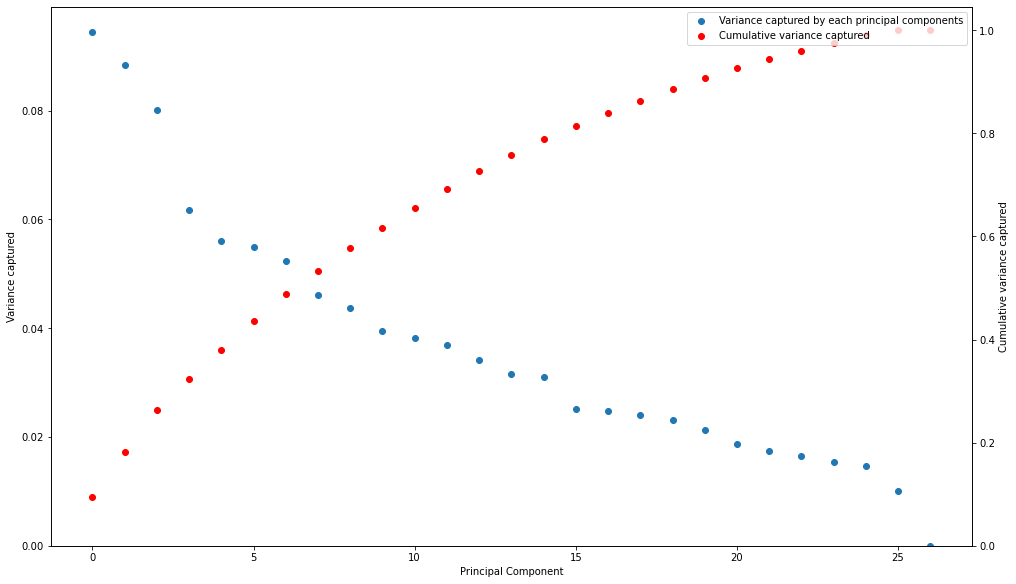

In [71]:
### Assess the amount of variance captured by each principal components

fig, ax = plt.subplots(1,1, figsize = (14,8), constrained_layout=True)

# Plot the amount of variance captured by each principal components
sc1 = ax.scatter(range(n_actors), explained_variance, label='Variance captured by each principal components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance captured')
ax.set_ylim(ymin=0)

# Plot the cumulative amount of variance captured on second y-axis
ax2 = ax.twinx()  # Create second y-axis
sc2 = ax2.scatter(range(n_actors), cumulative_variance, color='red', label='Cumulative variance captured')
ax2.set_ylabel('Cumulative variance captured')
ax2.set_ylim(ymin=0)

plt.legend(handles = [sc1, sc2], loc=1)
plt.savefig('variance_corona.png')

In [35]:
### Identify the types that loads most on each principal dimension

# Determine how many words to plot in each direction
n_terms = 15

# Identify the indices that sorts the two first components
PCa_load_sidx = L[:,0].argsort()
PCb_load_sidx = L[:,1].argsort()

# Find the terms that load most on the first principal component
PCa_plot_idx = np.concatenate((PCa_load_sidx[:n_terms], PCa_load_sidx[-n_terms:]))

# Identify remaining indices
remain_idx = np.array([idx for idx in PCb_load_sidx if idx not in PCa_plot_idx])

# Find the remaining terms that load most on the second principal component
PCb_plot_idx = np.concatenate((remain_idx[:n_terms], remain_idx[-n_terms:]))

# Combine the indices
PC_plot_idx = np.unique(np.concatenate((PCa_plot_idx, PCb_plot_idx)))

# Get the term names
PC_plot_names = type_names[assoc_idx][PC_plot_idx]

# Get the term loadings
PC_plot_load = L[PC_plot_idx,:]

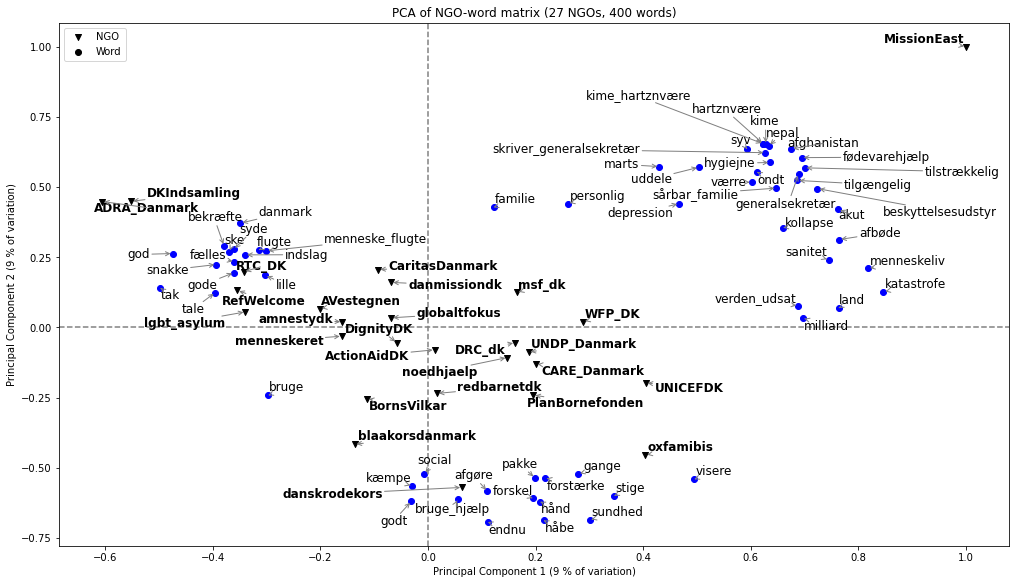

In [36]:
### Plot the socio-symbolic constellation
from adjustText import adjust_text
fig, ax = plt.subplots(1,1, figsize = (14,8), constrained_layout=True)

# Title and label text 
ax.set_title('PCA of NGO-word matrix ({} NGOs, {} words)'.format(standardized_actor2type_frequency.shape[0],
                                                                 standardized_actor2type_frequency.shape[1],
                                                                 fontsize = 20,fontweight='bold'))
ax.set_xlabel('Principal Component 1 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[0], fontsize = 15))
ax.set_ylabel('Principal Component 2 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[1], fontsize = 15))

# Grid to mark zero loading             
ax.axvline(x=0, c='grey', linestyle='--')
ax.axhline(y=0, c='grey', linestyle='--')
       
# Plot standardized principal component scores
ax.scatter(scaled_PC[:,0], scaled_PC[:,1], marker = 'v', label='NGO', c='black')

# Plot word loadings
ax.scatter(PC_plot_load[:,0], PC_plot_load[:, 1], marker = 'o', label='Word', c='blue')

# Annotate the plot
texts = []
for x, y, txt in zip(scaled_PC[:,0], scaled_PC[:,1], actor_names):
    texts.append(plt.text(x, y, txt, size=12, weight='bold'))


for x, y, txt in zip(PC_plot_load[:,0], PC_plot_load[:,1], PC_plot_names):
    texts.append(plt.text(x, y, txt, size=12))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey')) # This part is slow

# Set legend to black
plt.legend()
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
             
plt.show()

### The third and fourth dimension resctricted on covid/corona with hashtags

In [41]:
### Identify the types that loads most on each principal dimension

# Determine how many words to plot in each direction
n_terms = 15

# Identify the indices that sorts the two first components
PCa_load_sidx = L[:,0].argsort()
PCb_load_sidx = L[:,2].argsort()

# Find the terms that load most on the first principal component
PCa_plot_idx = np.concatenate((PCa_load_sidx[:n_terms], PCa_load_sidx[-n_terms:]))

# Identify remaining indices
remain_idx = np.array([idx for idx in PCb_load_sidx if idx not in PCa_plot_idx])

# Find the remaining terms that load most on the second principal component
PCb_plot_idx = np.concatenate((remain_idx[:n_terms], remain_idx[-n_terms:]))

# Combine the indices
PC_plot_idx = np.unique(np.concatenate((PCa_plot_idx, PCb_plot_idx)))

# Get the term names
PC_plot_names = type_names[assoc_idx][PC_plot_idx]

# Get the term loadings
PC_plot_load = L[PC_plot_idx,:]

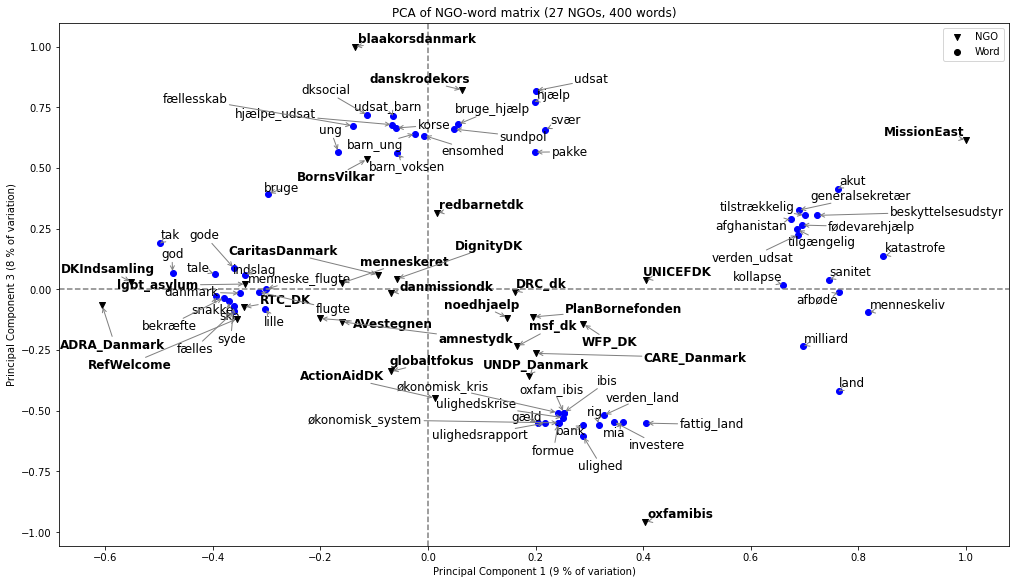

In [42]:
### Plot the socio-symbolic constellation

fig, ax = plt.subplots(1,1, figsize = (14,8), constrained_layout=True)

# Title and label text 
ax.set_title('PCA of NGO-word matrix ({} NGOs, {} words)'.format(standardized_actor2type_frequency.shape[0],
                                                                 standardized_actor2type_frequency.shape[1],
                                                                 fontsize = 20,fontweight='bold'))
ax.set_xlabel('Principal Component 1 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[0], fontsize = 15))
ax.set_ylabel('Principal Component 3 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[2], fontsize = 15))

# Grid to mark zero loading             
ax.axvline(x=0, c='grey', linestyle='--')
ax.axhline(y=0, c='grey', linestyle='--')
       
# Plot standardized principal component scores
ax.scatter(scaled_PC[:,0], scaled_PC[:,2], marker = 'v', label='NGO', c='black')

# Plot word loadings
ax.scatter(PC_plot_load[:,0], PC_plot_load[:, 2], marker = 'o', label='Word', c='blue')

# Annotate the plot
texts = []
for x, y, txt in zip(scaled_PC[:,0], scaled_PC[:,2], actor_names):
    texts.append(plt.text(x, y, txt, size=12, weight='bold'))


for x, y, txt in zip(PC_plot_load[:,0], PC_plot_load[:,2], PC_plot_names):
    texts.append(plt.text(x, y, txt, size=12))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey')) # This part is slow

# Set legend to black
plt.legend()
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
             
plt.show()

In [39]:
data_danish.to_csv('data_danish2.csv', index=False)

In [40]:
data_danish.head()

,actor,tweet,date,retweet,date_convert,@mentions,#hashtags,emojis,clean_text,language,words,without_stopwords,lemmas,proc_text,bigrams,proc_text_all,proc_freq
0,PlanBornefonden,"13-årige Larissa bor i Sahel-regionen, og var ...",2021-05-14 09:03:00,NaN,2021-05-14 00:00:00,NaN,NaN,,årige larissa bor i sahelregionen og var i tvu...,da,"['årige', 'larissa', 'bor', 'i', 'sahelregione...","['årige', 'larissa', 'bor', 'sahelregionen', '...","['årig', 'larissa', 'bor', 'sahelregion', 'tvi...",årig larissa bor sahelregion tvinge flygte lan...,"['årig_larissa', 'larissa_bor', 'bor_sahelregi...",årig larissa bor sahelregion tvinge flygte lan...,årig bor sahelregion tvinge flygte landsby man...
1,PlanBornefonden,Vi ønsker alle muslimer en god Eid i aften! Ei...,2021-05-12 14:00:02,NaN,2021-05-12 00:00:00,NaN,NaN,,vi ønsker alle muslimer en god eid i aften eid...,da,"['vi', 'ønsker', 'alle', 'muslimer', 'en', 'go...","['ønsker', 'muslimer', 'god', 'eid', 'aften', ...","['ønske', 'muslim', 'god', 'eid', 'aften', 'ei...",ønske muslim god eid aften eid mubarak,"['ønske_muslim', 'muslim_god', 'god_eid', 'eid...",ønske muslim god eid aften eid mubarak ønske_m...,ønske god eid aften eid
2,PlanBornefonden,Kom til samtalekøkken med @BosseStine og @Clau...,2021-05-12 11:58:03,@dorthe10,2021-05-12 00:00:00,"['BosseStine, ClausMeyerDK']",dkfood,,kom til samtalekøkken med og den maj og spis e...,da,"['kom', 'til', 'samtalekøkken', 'med', 'og', '...","['kom', 'samtalekøkken', 'maj', 'spis', 'lække...","['komme', 'samtalekøkken', 'maj', 'spise', 'læ...",komme samtalekøkken maj spise lækker ret menu ...,"['komme_samtalekøkken', 'samtalekøkken_maj', '...",komme samtalekøkken maj spise lækker ret menu ...,komme maj spise ret men klog kærlighed penge m...
3,PlanBornefonden,"Mali, Burkina Faso og Niger - også kendt som d...",2021-05-12 10:00:02,NaN,2021-05-12 00:00:00,NaN,NaN,,mali burkina faso og niger også kendt som det ...,da,"['mali', 'burkina', 'faso', 'og', 'niger', 'og...","['mali', 'burkina', 'faso', 'niger', 'kendt', ...","['mali', 'burkina', 'faso', 'niger', 'kendt', ...",mali burkina faso niger kendt central sahele s...,"['mali_burkina', 'burkina_faso', 'faso_niger',...",mali burkina faso niger kendt central sahele s...,mali burkina faso niger kendt central sahele s...
4,PlanBornefonden,Vores seje kollega Iben Østergaard Markussen f...,2021-05-12 09:23:14,@dorthe10,2021-05-12 00:00:00,"['radioloud_dk, MaternityF']",NaN,,vores seje kollega iben østergaard markussen f...,da,"['vores', 'seje', 'kollega', 'iben', 'østergaa...","['seje', 'kollega', 'iben', 'østergaard', 'mar...","['sej', 'kollega', 'ibe', 'østergaard', 'marku...",sej kollega ibe østergaard markusse fortæller ...,"['sej_kollega', 'kollega_ibe', 'ibe_østergaard...",sej kollega ibe østergaard markusse fortæller ...,sej kollega fortæller morgen podcast arbejde u...
